In [1]:
from quasinet.qnet import qdistance, save_qnet
from cognet.cognet import cognet as cg
from cognet.dataFormatter import dataFormatter
from cognet.model import model 
#import cognet.util
import pandas as pd
import numpy as np

In [2]:
## read in data, configure to Qnet specifications and fit Qnet model
data_obj=dataFormatter(samples="data/PTSD_cognet_test_processed.csv")
features,samples = data_obj.Qnet_formatter()

In [3]:
fit = False
model_obj = model()
if fit:
    model_obj.fit(data_obj=data_obj, njobs=2)
    # model_obj.save("examples_results/PTSD_cognet_test.joblib")
    save_qnet(model_obj.myQnet, "results/PTSD_cognet_test.joblib", low_mem=False)
else:
    model_obj.load("results/PTSD_cognet_test.joblib")

In [5]:
# load Qnet, write mpi files for distance matrix
# run qdistance matrix with "./mpi_run.sh" command
cognet_obj = cg()
cognet_obj.load_from_model(model_obj, data_obj, 'all')
cognet_obj.samples

,ptsd1,ptsd2,ptsd3,ptsd4,ptsd5,ptsd6,ptsd7,ptsd8,ptsd9,ptsd10,...,ptsd202,ptsd203,ptsd204,ptsd205,ptsd206,ptsd207,ptsd208,ptsd209,ptsd210,ptsd211
0,4,2,5,4,2,3,2,3,3,2,...,2,4,4,3,2,3,2,2,4,2
1,3,2,3,3,1,3,2,2,2,1,...,3,4,4,3,3,3,4,3,4,5
2,2,2,2,4,1,3,3,2,2,4,...,4,2,2,4,4,2,3,2,2,5
3,2,2,5,1,3,2,1,2,2,1,...,1,2,3,3,3,2,1,1,2,2
4,4,1,1,1,2,2,1,1,1,2,...,2,2,2,2,1,1,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,4,2,3,4,1,1,1,1,3,2,...,2,2,2,2,2,2,2,2,2,3
300,5,2,2,4,4,3,2,5,4,4,...,5,5,5,5,4,5,5,4,4,5
301,5,1,2,1,1,3,5,5,3,4,...,4,3,3,2,3,1,3,2,5,5
302,2,1,3,3,1,2,2,2,1,1,...,1,1,1,1,1,2,2,2,2,2


In [55]:
cognet_obj.dmat_filewriter("results/PTSD_cognet_test.joblib",
                           #mpi_path="mpi_tmp",
                           pyfile="PTSD_cognet.py",
                           NODES=4,T=2)

In [6]:
# random mask and reconstruction
cognet_obj.set_nsamples(10)
recon_df = cognet_obj.randomMaskReconstruction_multiple('results/PTSD_randomMaskRecon_test.csv')
print("reconstruction results", recon_df)

reconstruction results       rederr    r_prob  rand_err  \
0  41.070691  0.217117  0.374716   
1  47.548905  0.217431  0.400493   
2  43.489215  0.216990  0.391483   
3  34.691464  0.217347  0.429552   
4  30.776463  0.218868  0.437426   
5  45.663290  0.217647  0.379891   
6  13.756572  0.218137  0.455342   
7  27.537785  0.221000  0.476135   
8  40.948393  0.218103  0.390946   
9  31.504744  0.219907  0.367701   

                                               mask_  
0  [ptsd1, ptsd2, ptsd3, ptsd4, ptsd7, ptsd8, pts...  
1  [ptsd2, ptsd4, ptsd6, ptsd7, ptsd8, ptsd11, pt...  
2  [ptsd7, ptsd12, ptsd13, ptsd14, ptsd16, ptsd18...  
3  [ptsd1, ptsd4, ptsd6, ptsd7, ptsd8, ptsd9, pts...  
4  [ptsd1, ptsd2, ptsd8, ptsd9, ptsd10, ptsd12, p...  
5  [ptsd1, ptsd6, ptsd9, ptsd10, ptsd11, ptsd13, ...  
6  [ptsd1, ptsd2, ptsd3, ptsd4, ptsd5, ptsd6, pts...  
7  [ptsd1, ptsd3, ptsd4, ptsd5, ptsd7, ptsd11, pt...  
8  [ptsd1, ptsd8, ptsd9, ptsd10, ptsd13, ptsd16, ...  
9  [ptsd1, ptsd2, ptsd4, ptsd6

In [7]:
cognet_dist = qdistance(np.array(cognet_obj.samples.iloc[3]), np.array(cognet_obj.samples.iloc[4]), model_obj.myQnet, model_obj.myQnet)
qdistance(samples[3],samples[4], model_obj.myQnet, model_obj.myQnet)
#samples.shape
#len(model_obj.myQnet.feature_names)

0.09268731566380245

In [8]:
print(samples[3])
print(np.array(data_obj.samples.iloc[3]))

['2' '2' '5' '1' '3' '2' '1' '2' '2' '1' '2' '3' '3' '3' '3' '1' '3' '2'
 '2' '1' '1' '1' '1' '3' '3' '2' '3' '4' '3' '3' '1' '2' '4' '3' '3' '3'
 '3' '1' '3' '2' '3' '4' '2' '3' '3' '1' '1' '3' '3' '3' '1' '3' '4' '1'
 '1' '2' '2' '1' '1' '4' '3' '1' '1' '1' '2' '1' '1' '2' '2' '1' '1' '2'
 '2' '2' '2' '2' '2' '1' '2' '2' '1' '3' '1' '3' '3' '2' '2' '1' '2' '2'
 '1' '1' '3' '3' '2' '1' '1' '4' '1' '2' '1' '1' '4' '2' '2' '1' '1' '4'
 '3' '2' '1' '1' '3' '4' '2' '2' '1' '1' '1' '2' '2' '1' '3' '3' '2' '2'
 '1' '1' '1' '2' '1' '2' '2' '1' '1' '1' '1' '2' '1' '1' '1' '1' '1' '2'
 '1' '1' '2' '3' '2' '1' '1' '1' '2' '2' '2' '1' '1' '2' '1' '1' '1' '1'
 '1' '1' '2' '1' '1' '1' '1' '1' '2' '1' '1' '1' '2' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '2' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '2' '1' '1' '1' '2' '3' '3' '3' '2' '1' '1' '2' '2']
[2 2 5 1 3 2 1 2 2 1 2 3 3 3 3 1 3 2 2 1 1 1 1 3 3 2 3 4 3 3 1 2 4 3 3 3 3
 1 3 2 3 4 2 3 3 1 1 3 3 3 1 3 4 1 1 2 2 1 1 4 3 1 1 1 2 1 1 2 2 1 1

In [13]:
data_obj.samples.iloc[2]

ptsd1      2
ptsd2      2
ptsd3      2
ptsd4      4
ptsd5      1
          ..
ptsd207    2
ptsd208    3
ptsd209    2
ptsd210    2
ptsd211    5
Name: 2, Length: 211, dtype: int64

In [ ]:
# embed distance matrix, make sure to generate distance matrix first
cognet_obj.embed("mpi_tmp/distmatrix.csv", "PTSD", "mpi_tmp/",EMBED_BINARY='cognet/cognet/bin/__embed__.so')

In [14]:
# compute dissonance matrix
cognet_obj.set_nsamples(304)
return_dict = cognet_obj.dissonance_matrix(outfile="mpi_tmp/PTSD_dissonance_matrix.csv", processes=2)
return_dict

The number of selected samples (304) is equal to the number of samples (304)!


,ptsd1,ptsd2,ptsd3,ptsd4,ptsd5,ptsd6,ptsd7,ptsd8,ptsd9,ptsd10,...,ptsd202,ptsd203,ptsd204,ptsd205,ptsd206,ptsd207,ptsd208,ptsd209,ptsd210,ptsd211
0,0.312509,0.000000,0.266935,0.264993,0.778503,0.051811,0.000000,0.272496,0.049030,0.147404,...,0.000000,0.000000,0.369530,0.259742,0.000000,0.309774,0.000000,0.000000,0.274517,0.000000
1,0.429788,0.000000,0.166296,0.000000,0.000000,0.086513,0.000000,0.000000,0.058872,0.025926,...,0.556886,0.000000,0.435161,0.246107,0.263992,0.362627,0.425756,0.455718,0.194502,0.251415
2,0.306131,0.000000,0.000000,0.252755,0.000000,0.065765,0.254303,0.000000,0.031635,0.354011,...,0.702195,0.000000,0.000000,0.244961,0.355941,0.249957,0.300921,0.000000,0.000000,0.234866
3,0.192401,0.000000,0.514859,0.474972,0.893145,0.000000,0.519839,0.000000,0.000000,0.000000,...,0.278177,0.099964,0.331973,0.285513,0.274473,0.519960,0.091940,0.232926,0.000000,0.130753
4,0.415880,0.000000,0.254754,0.000000,0.831320,0.000000,0.347092,0.375952,0.000000,0.576713,...,0.000000,0.092742,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,0.330024,0.000000,0.149207,0.267490,0.000000,0.738852,0.224587,0.602091,0.117116,0.143742,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.249741,0.000000,0.000000,0.000000,0.052923
300,0.000000,0.000000,0.000000,0.249808,0.879533,0.077795,0.000000,0.782421,0.366725,0.289640,...,0.838320,0.193643,0.496172,0.590501,0.448635,0.862854,0.582499,0.439068,0.244644,0.174974
301,0.000000,0.428529,0.000000,0.444634,0.000000,0.101347,0.828235,0.799723,0.000000,0.389157,...,0.707353,0.253141,0.211427,0.000000,0.242976,0.000000,0.335091,0.000000,0.303350,0.617431
302,0.234129,0.516656,0.222903,0.000000,0.000000,0.000000,0.000000,0.000000,0.401965,0.000000,...,0.263453,0.561109,0.731449,0.684090,0.005422,0.675809,0.000000,0.000000,0.000000,0.000000


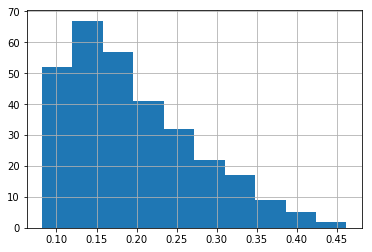

In [15]:
D=pd.DataFrame(return_dict.copy())
D.mean(axis=1).hist()

In [16]:
# computing dissonance of random samples
print("___________________________________________________")
n=100
random_samples = cognet_obj.random_sample(n=n)
print("{} random samples computed".format(n))
random_samples_strings = random_samples.values.astype(str)
cols = cognet_obj.samples.columns
outfile = "result/PTSD_random_samples_dissonance_matrix.csv"
results = []
for s in random_samples_strings:
    results.append(cognet_obj.dissonance(0, sample=s))
result_df = pd.DataFrame(results)
result_df

___________________________________________________


TypeError: random_sample() got an unexpected keyword argument 'n'

In [ ]:
result_df.mean(axis=1).hist()

In [ ]:
return_df = pd.DataFrame()
for col in cognet_obj.samples.columns:
    return_df[col] = cognet_obj.samples[col].sample(n=1, replace=True).values
return_df

In [30]:
cognet_obj.samples[cognet_obj.samples.index.duplicated()]

,ptsd1,ptsd2,ptsd3,ptsd4,ptsd5,ptsd6,ptsd7,ptsd8,ptsd9,ptsd10,...,ptsd202,ptsd203,ptsd204,ptsd205,ptsd206,ptsd207,ptsd208,ptsd209,ptsd210,ptsd211


In [ ]:
# samples = pd.read_csv("PTSD_cognet_test.csv")
# samples = samples.drop(['record_id', 'PTSDDx'], axis=1)
# samples.to_csv("PTSD_cognet_test_processed.csv", index=False)
# samples = pd.read_csv("PTSD_cognet_test_processed.csv")
# samples